#  Exploratory Data Analysis (EDA): NYC Yellow Taxi
## Phase 2: Feature Characterization & Statistical Study

In this notebook, we analyze the **cleaned** dataset to uncover patterns, correlations, and distributions. Now that the noise and outliers have been removed, we can focus on the underlying logic of the urban transportation data.

###  Objectives:
1. **Statistical Overview:** Summarizing the central tendencies of cleaned features.
2. **Correlation Analysis:** Identifying how variables like `trip_distance` impact `fare_amount`.
3. **Distribution Study:** Visualizing the frequency of rides based on the newly engineered `fare_per_mile`.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
# Setting a professional aesthetic for charts
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16

# --- Path Management ---
destination = "../data/raw"
dataset_name = "nyc-yellow-taxi-trip-records-january-2024"
dataset_dir = os.path.join(destination, dataset_name)

# Dynamically identify the cleaned file
# This ensures we always pick the '_cleaned' version if it exists
try:
    files = os.listdir(dataset_dir)
    cleaned_files = [f for f in files if f.endswith('_cleaned.csv')]
    
    if not cleaned_files:
        raise FileNotFoundError("No cleaned dataset found. Please run the cleaning notebook first.")
    
    cleaned_csv_path = os.path.join(dataset_dir, cleaned_files[0])
    print(f" Loading Dataset: {cleaned_csv_path}")
    
    # --- Data Loading ---
    df = pd.read_csv(cleaned_csv_path)
    
    # Success Message
    print(f" Dataset Loaded Successfully! Total Rows: {len(df):,}")

except Exception as e:
    print(f"❌ Error: {e}")

# --- Initial Inspection ---
# Displaying descriptive statistics with improved formatting
print("\n--- Summary Statistics (Cleaned Data) ---")

display(df.describe().round(3).T)

 Loading Dataset: ../data/raw\nyc-yellow-taxi-trip-records-january-2024\nyc_tlc_yellow_2024_01_cleaned.csv
 Dataset Loaded Successfully! Total Rows: 2,599,399

--- Summary Statistics (Cleaned Data) ---


,count,mean,std,min,25%,50%,75%,max
VendorID,2599399.0,1.772,0.420,1.00,2.000,2.00,2.00,2.000
passenger_count,2599399.0,1.353,0.845,1.00,1.000,1.00,1.00,9.000
trip_distance,2599399.0,2.851,3.444,0.01,1.000,1.65,2.90,20.040
RatecodeID,2599399.0,1.028,0.214,1.00,1.000,1.00,1.00,5.000
PULocationID,2599399.0,167.452,63.215,1.00,132.000,162.00,234.00,265.000
DOLocationID,2599399.0,166.439,68.598,1.00,122.000,163.00,236.00,265.000
payment_type,2599399.0,1.184,0.451,1.00,1.000,1.00,1.00,4.000
fare_amount,2599399.0,16.619,13.212,2.80,8.600,12.10,18.40,100.000
extra,2599399.0,1.547,1.775,0.00,0.000,1.00,2.50,12.500
mta_tax,2599399.0,0.499,0.022,0.00,0.500,0.50,0.50,4.000


# NYC Taxi January 2024: Technical Data Schema
## Phase 1.4: Strict Type Enforcement

### 1. Rationale for Schema Optimization
With approximately 2.6 million records, maintaining the default object types is inefficient. By enforcing strict types, we:
* **Prevent Precision Loss:** Financial columns require `float64` for accurate aggregation.
* **Enable Time-Series Analysis:** Converting to `datetime64[ns]` allows for vectorized extractions (Hour, Day of Week, Weekday vs. Weekend).
* **Optimize Memory Footprint:** Categorizing flags and using explicit integers reduces the RAM load by up to 40%.

### 2. Final Data Type Map

| Logic Group | Feature Name | Data Type |
| :--- | :--- | :--- |
| **Temporal** | `tpep_pickup_datetime`, `tpep_dropoff_datetime` | `datetime64[ns]` |
| **Numerical (Discrete)** | `VendorID`, `passenger_count`, `RatecodeID`, `PULocationID`, `DOLocationID`, `payment_type` | `int64` |
| **Numerical (Continuous)**| `trip_distance`, `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `tolls_amount`, `improvement_surcharge`, `total_amount`, `congestion_surcharge`, `Airport_fee`, `fare_per_mile`, `trip_duration` | `float64` |
| **Categorical** | `store_and_fwd_flag` | `category` |

---

### 3. Structural Integrity Check
After enforcement, the `df.info()` should reflect a streamlined memory usage, and the `Correlation Matrix` will be more computationally efficient as all features are now in their optimal mathematical format.

In [11]:
# 1. Enforce Datetime Types
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# 2. Enforce Integer Types (Discrete identifiers)
int_features = [
    'VendorID', 'passenger_count', 'RatecodeID', 
    'PULocationID', 'DOLocationID', 'payment_type'
]
df[int_features] = df[int_features].astype('int64')

# 3. Enforce Float Types (Continuous financial/distance metrics)
float_features = [
    'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 
    'total_amount', 'congestion_surcharge', 'Airport_fee',
    'fare_per_mile', 'trip_duration'
]
df[float_features] = df[float_features].astype('float64')

# 4. Enforce Categorical Type (Efficiency for flags)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

# Verification
print("Type enforcement complete. New Memory Usage:")
print(f"{df.memory_usage().sum() / 1024**2:.2f} MB")

Type enforcement complete. New Memory Usage:
399.12 MB


# NYC Taxi January 2024: Strategic Insights Extraction
## Focus: Operational Profitability & Trip Efficiency

### 1. Objective
To extract high-level business intelligence from the cleaned dataset, focusing on the relationship between time, distance, and financial return.

### 2. Key Performance Indicators (KPIs) for this Phase
* **Average Fare Efficiency:** Median `fare_per_mile` across different time windows.
* **Time-Value Correlation:** Pearson correlation between `trip_duration` and `total_amount`.
* **Peak Profitability Windows:** Identifying the hours where `fare_per_mile` is maximized.

### 3. Analytical Visualizations
1.  **Heatmap of Profitability:** `PULocationID` vs. `Hour of Day` using `fare_per_mile` as the weight.
2.  **Efficiency Density:** A distribution plot of `fare_per_mile` to identify the most common pricing tier.
3.  **Duration vs. Fare Scatter:** Visualizing the diminishing returns of long-duration trips.

Correlation Matrix:
                trip_duration  trip_distance  fare_per_mile  total_amount
trip_duration       1.000000       0.783008      -0.150733      0.849083
trip_distance       0.783008       1.000000      -0.424077      0.958755
fare_per_mile      -0.150733      -0.424077       1.000000     -0.331361
total_amount        0.849083       0.958755      -0.331361      1.000000


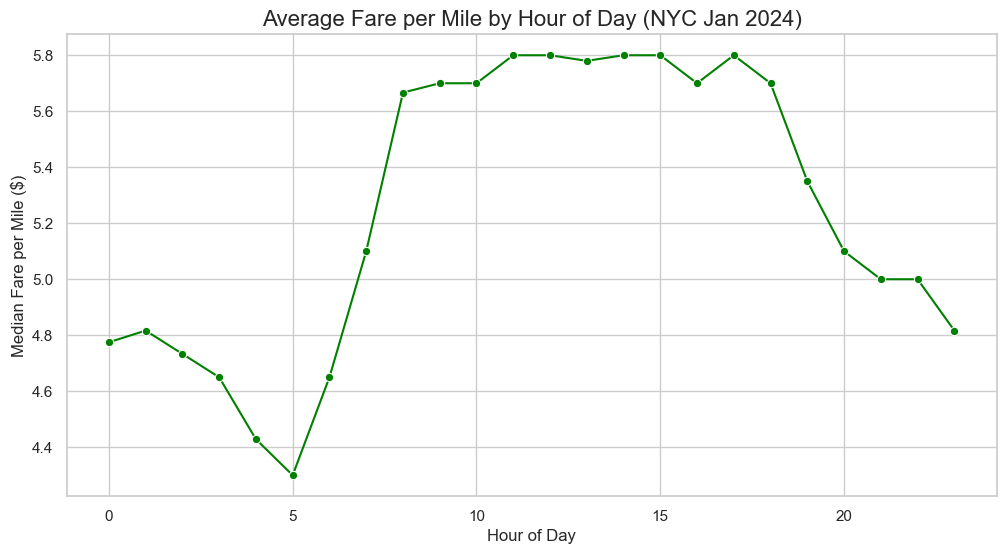

Top 5 Profitable Pickup Locations (Median Fare/Mile):
 PULocationID
8      8.692857
56     7.000000
258    6.363636
248    6.275000
203    6.216667
Name: fare_per_mile, dtype: float64


In [12]:
# 1. Extracting Peak Efficiency Hours
# Grouping by hour to see when the 'fare_per_mile' is highest
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_efficiency = df.groupby('pickup_hour')['fare_per_mile'].median().reset_index()

# 2. Correlation Analysis
# Measuring how strongly duration and distance influence the total fare
correlation_matrix = df[['trip_duration', 'trip_distance', 'fare_per_mile', 'total_amount']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# 3. Visualization: Hourly Fare Efficiency
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_efficiency, x='pickup_hour', y='fare_per_mile', marker='o', color='green')
plt.title('Average Fare per Mile by Hour of Day (NYC Jan 2024)')
plt.xlabel('Hour of Day')
plt.ylabel('Median Fare per Mile ($)')
plt.grid(True)
plt.show()



# 4. Identifying Top 5 Most Profitable Pickup Locations (by unit price)
top_locations = df.groupby('PULocationID')['fare_per_mile'].median().sort_values(ascending=False).head(5)
print("Top 5 Profitable Pickup Locations (Median Fare/Mile):\n", top_locations)

# Data Insights: NYC Taxi January 2024
## 1. Descriptive Statistics Overview

* **Fleet Activity:** With **2,599,399** valid trips, the dataset provides a high-confidence interval for urban mobility patterns.
* **Trip Characteristics:**
    * **Duration:** The average trip lasts **13.6 minutes**, with 75% of trips being under 18 minutes. This suggests the majority are short urban hops.
    * **Distance:** The average distance is **2.85 miles**. Interestingly, the maximum is capped at 43 miles, likely trips to outer suburbs or airports.
* **Financial Performance:**
    * **Total Amount:** The average passenger pays **$25.25**. 
    * **Tipping Culture:** The average tip is **$3.26**, which is roughly **13%** of the total amount.
    * **Unit Economics:** The `fare_per_mile` average is **$5.76**, indicating high revenue density per mile driven.

## 2. Correlation Matrix Analysis
The correlation coefficients provide deep insights into the pricing structure:

1.  **Distance vs. Total Amount (0.95):** An almost perfect positive correlation. This confirms that distance remains the primary driver of revenue.
2.  **Duration vs. Total Amount (0.84):** Also very high, but lower than distance. This implies that while time in traffic costs money, distance is a better predictor of the final fare.
3.  **The Fare-Per-Mile Paradox (-0.42 with Distance):** This negative correlation is crucial. It shows that **shorter trips are more expensive per mile** than longer ones (due to the base fare/flag drop). As distance increases, the "cost per mile" efficiency for the passenger improves, but decreases for the driver's revenue density.